<a href="https://colab.research.google.com/github/Puru-Gupta/Assignment_Artivatic/blob/main/Artivatic_Assignment_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Problem Statement**
*The Bank Indessa has not done well in the last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose the confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.* 
<br>

After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. 
With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.  
<br>

This bank uses a pool of investors to sanction their loans. <br>
***For example:*** If any customer has applied for a loan of $20000, along with the bank, the investors perform due diligence on the requested loan application. Keep this in mind while understanding data.  
In this challenge, you will help this bank by predicting the probability that a member will default. *italicized text*

**Importing the Necessary Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Collection and Preprocessing**<br>
Read the Loan data CSV and pull the file info.

In [3]:
train_path = "/content/drive/MyDrive/Artivatic/ML_Artivatic_dataset/train_indessa.csv"
test_path = "/content/drive/MyDrive/Artivatic/ML_Artivatic_dataset/test_indessa.csv"

In [4]:
train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)

In [5]:
train_set.shape, test_set.shape

((532428, 45), (354951, 44))

In [6]:
train_set.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [ ]:
test_set.head()

# Function to calculate missing values by column

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
          # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(train_set)

Your selected dataframe has 45 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
verification_status_joint,532123,99.9
desc,456829,85.8
mths_since_last_record,450305,84.6
mths_since_last_major_derog,399448,75.0
mths_since_last_delinq,272554,51.2
batch_enrolled,85149,16.0
tot_cur_bal,42004,7.9
tot_coll_amt,42004,7.9
total_rev_hi_lim,42004,7.9
emp_title,30833,5.8


In [9]:
#pd.isnull(train_set)
pd.DataFrame.isnull(train_set).sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

**Plotting heapmap to get correlation and avoid Multicollinearity**

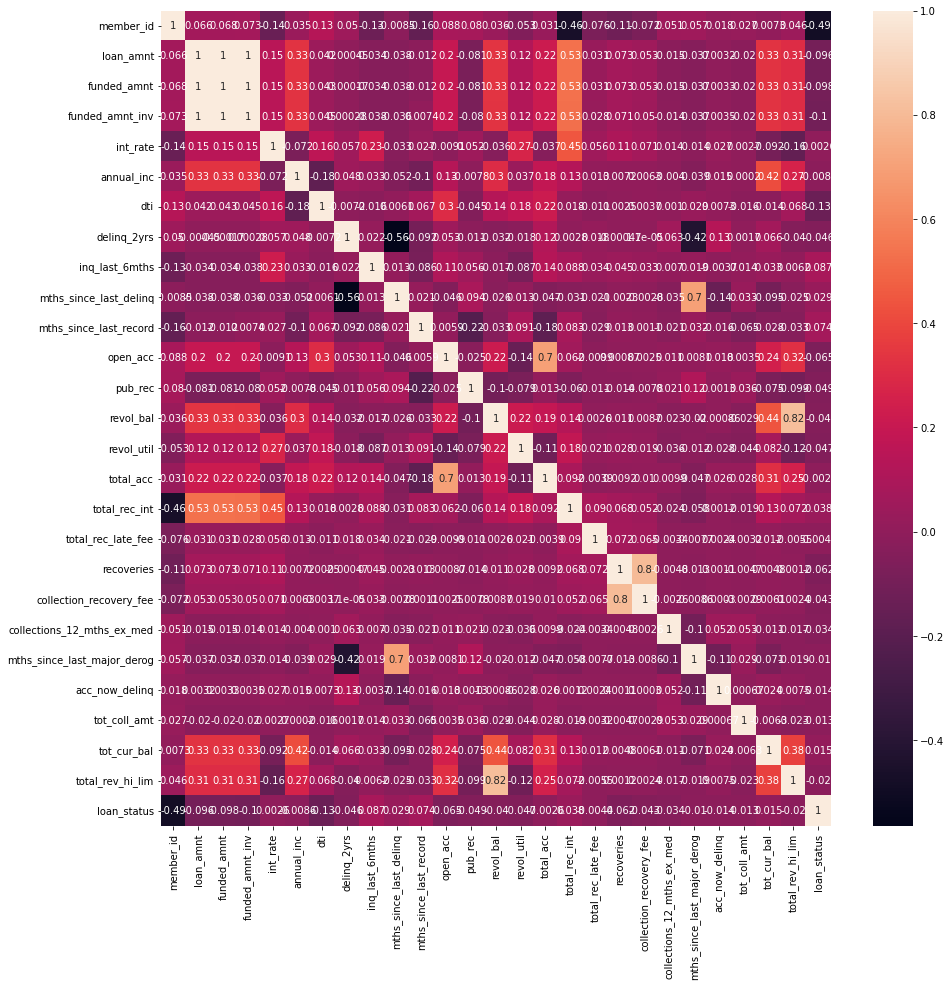

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(train_set.corr(), annot = True)
plt.show()

In [11]:
col_name = ["member_id","funded_amnt","funded_amnt_inv","batch_enrolled","emp_title", "emp_length", "desc", "title", "mths_since_last_delinq",
           "mths_since_last_record", "mths_since_last_major_derog", "verification_status_joint" , "total_rev_hi_lim","last_week_pay",
            "zip_code","addr_state","sub_grade","initial_list_status",'collection_recovery_fee', 'open_acc','application_type','pymnt_plan']

In [12]:
train_dataset = train_set.drop(col_name, axis =1)
test_dataset = test_set.drop(col_name, axis =1)
train_dataset.shape, test_dataset.shape

((532428, 23), (354951, 22))

In [13]:
train_dataset['term'] = train_dataset['term'].map(lambda x: x.lstrip('+-').rstrip('months'))
test_dataset['term'] = test_dataset['term'].map(lambda x: x.lstrip('+-').rstrip('months'))

Filling missing value Using linear Interpolation Method

In [14]:
interpolate_value = 'pub_rec','total_acc','revol_util','collections_12_mths_ex_med','annual_inc','delinq_2yrs','inq_last_6mths','acc_now_delinq',"tot_coll_amt", "tot_cur_bal"


In [15]:
for x in interpolate_value:
  train_dataset[x].interpolate(method ="linear", inplace= True, limit_direction='forward')
  test_dataset[x].interpolate(method ="linear", inplace= True, limit_direction='forward')

In [ ]:
# drop_corr_col = ['collection_recovery_fee', 'open_acc']
# train_dataset = train_dataset.drop(drop_corr_col, axis= 1)
# test_dataset = test_dataset.drop(drop_corr_col, axis=1)

In [16]:
X = train_dataset.drop('loan_status', axis = 1)
y = train_dataset['loan_status']
X.shape

(532428, 22)

In [86]:
X.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,14350,36,19.19,E,OWN,28700.0,Source Verified,debt_consolidation,33.88,0.0,1.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,0.0,28699.0
1,4800,36,10.99,B,MORTGAGE,65000.0,Source Verified,home_improvement,3.64,0.0,1.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,0.0,9974.0
2,10000,36,7.26,A,OWN,45000.0,Not Verified,debt_consolidation,18.42,0.0,0.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,65.0,38295.0
3,15000,36,19.72,D,RENT,105000.0,Not Verified,debt_consolidation,14.97,0.0,2.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,0.0,55564.0
4,16000,36,10.64,B,RENT,52000.0,Verified,credit_card,20.16,0.0,0.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,0.0,47159.0


### **Exploratory Data Analysis**

Text(0.5, 1.0, 'Verification_status of customer')

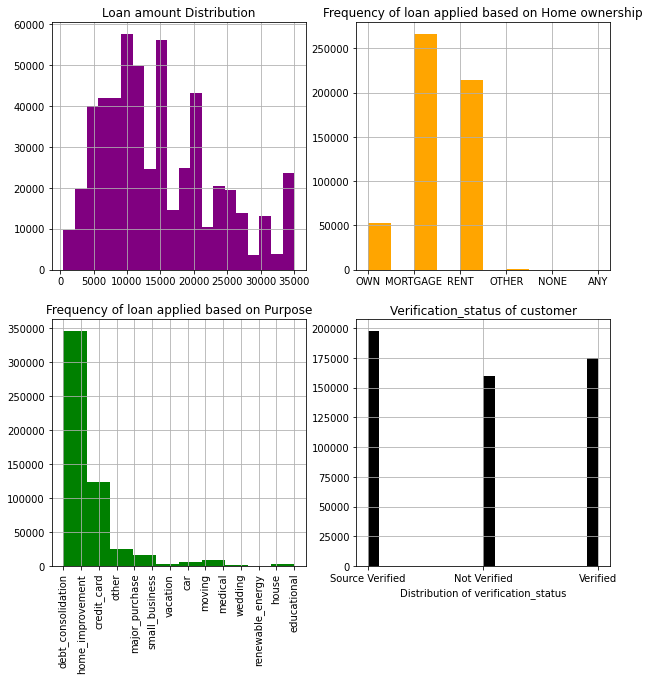

In [89]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
(X['loan_amnt']).hist(bins=20, color='purple')
plt.title(label="Loan amount Distribution")

plt.subplot(2,2,2)
X['home_ownership'].hist(color='orange')
plt.title(label="Frequency of loan applied based on Home ownership")

plt.subplot(2,2,3)
X['purpose'].hist(bins=10,color='green')
plt.xticks(rotation='vertical')
plt.title(label="Frequency of loan applied based on Purpose")

plt.subplot(2,2,4)
(X['verification_status']).hist(bins=20,color='black')
plt.xlabel("Distribution of verification_status")
plt.title(label="Verification_status of customer")
#plt.hist(bins=200)


Text(0.5, 1.0, 'loan_status with respect to their grade')

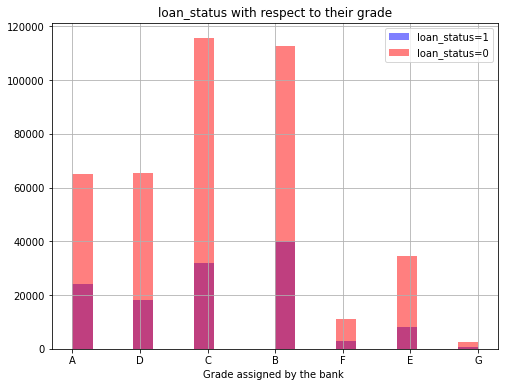

In [17]:
plt.figure(figsize=(8,6))
train_dataset[train_dataset['loan_status']==1]['grade'].hist(alpha=0.5,color='blue',bins=20,label='loan_status=1')
train_dataset[train_dataset['loan_status']==0]['grade'].hist(alpha=0.5,color='red',bins=20,label='loan_status=0')
plt.legend()
plt.xlabel('Grade assigned by the bank ')
plt.title(label="loan_status with respect to their grade")

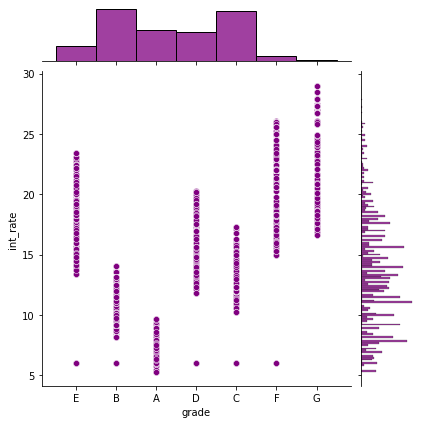

In [17]:
jplot = sns.jointplot(x='grade',y='int_rate',data=X,color='purple')


In [ ]:
# annual_inc= np.log(X['annual_inc'])
# revol_bal =np.log(X['revol_bal'])
# df = [annual_inc, revol_bal]
# dataplot = pd.concat(df,  axis=1, join='inner')
# dataplot.columns = ['annual_inc', 'revol_bal']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

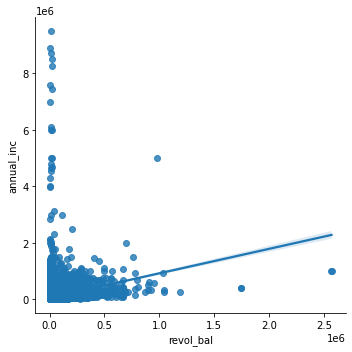

In [18]:
plt.figure(figsize=(12,7))
#dataplot['annual_inc'].hist(bins=10)
sns.lmplot(y='annual_inc',x='revol_bal', data= X)


**Check the label "*loan_status*" distribution in the dataset**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


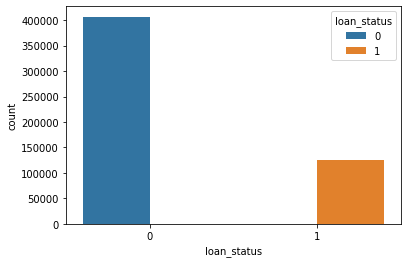

In [136]:
#plt.bar(train_data_dumm['loan_status'],height=1, width=0.8)
sns.countplot(train_dataset['loan_status'], hue=train_dataset['loan_status'])
plt.show()

**Percentage of Defaulter & Non_Defaulter Labels**

In [155]:
 Defaulter = train_dataset[train_dataset['loan_status']==1]
 Non_Defaulter = train_dataset[train_dataset['loan_status']==0]

print("No of loan Defaulter:", Defaulter.shape[0])
print("% of loan Defaulter", Defaulter.shape[0]/train_dataset.shape[0]*100)
print("No of loan Non_Defaulter:", Non_Defaulter.shape[0])
print("% of loan Non_Defaulter", Non_Defaulter.shape[0]/train_dataset.shape[0]*100)

No of loan Defaulter: 125827
% of loan Defaulter 23.632678972555915
No of loan Non_Defaulter: 406601
% of loan Non_Defaulter 76.36732102744409


**The above shows, This dataset is imbalanced **

In [18]:
#Changing to int type
X['term'] = X['term'].astype(int)
test_dataset['term']= test_dataset['term'].astype(int)

In [19]:
for i in X.select_dtypes('object').columns:
  Value_count = X[i].unique()
  print(i,"---->",Value_count)
  

grade ----> ['E' 'B' 'A' 'D' 'C' 'F' 'G']
home_ownership ----> ['OWN' 'MORTGAGE' 'RENT' 'OTHER' 'NONE' 'ANY']
verification_status ----> ['Source Verified' 'Not Verified' 'Verified']
purpose ----> ['debt_consolidation' 'home_improvement' 'credit_card' 'other'
 'major_purchase' 'small_business' 'vacation' 'car' 'moving' 'medical'
 'wedding' 'renewable_energy' 'house' 'educational']


In [20]:
def binary_encoding(df, colunms_with_positive_values):
  df= df.copy()
  for column, positive_values in colunms_with_positive_values:
    df[column]= df[column].apply(lambda x: 1 if x== positive_values else 0)
  return df

def ordinal_encoding(df, column_ordering):
  df= df.copy()
  for column, ordering in column_ordering:
    df[column]= df[column].apply(lambda x: ordering.index(x))
  return df  

def one_hot_encoding(df):  
  df = df.copy()
  df = pd.get_dummies(df)
  return df


In [21]:
def preprocessing_input(df):
  df= df.copy()
  # Binary Encoding for varibles
  # df= binary_encoding(
  #       df, 
  #       colunms_with_positive_values=[
  #                     ('pymnt_plan', 'y'),
  #                     ('application_type','INDIVIDUAL')])


   #ordinal Encoding 
  df = ordinal_encoding(
       df, 
       column_ordering =[
                   ('grade', ['G','F', 'E', 'D','A', 'C', 'B']),
                   ('home_ownership', ['NONE','ANY','OTHER','OWN','RENT','MORTGAGE']),
                   ('verification_status', ['Not Verified','Verified','Source Verified'])
                                              ]
                        )
  df= one_hot_encoding(df)  
                                               
  return df


In [22]:
X =preprocessing_input(X)

In [23]:
test_dataset = preprocessing_input(test_dataset)


In [24]:
from sklearn.feature_selection import SelectKBest, chi2
best_features = SelectKBest(score_func=chi2, k = 21)
fit = best_features.fit(X,y)

In [25]:
df_score = pd.DataFrame(fit.scores_)
df_column = pd.DataFrame(X.columns) 

In [26]:
feature_score = pd.concat([df_column, df_score], axis=1)
feature_score.columns = ['Features_list', 'Feature_Score']

In [27]:
print((feature_score))

                 Features_list  Feature_Score
0                    loan_amnt   2.351226e+07
1                         term   2.556166e+04
2                     int_rate   5.171488e+00
3                        grade   3.510662e+02
4               home_ownership   1.006288e+01
5                   annual_inc   2.226011e+06
6          verification_status   2.960337e+03
7                          dti   3.692724e+04
8                  delinq_2yrs   2.617819e+03
9               inq_last_6mths   5.813021e+03
10                     pub_rec   2.226571e+03
11                   revol_bal   2.537792e+07
12                  revol_util   1.221265e+04
13                   total_acc   2.045981e+01
14               total_rec_int   1.956087e+06
15          total_rec_late_fee   4.275889e+02
16                  recoveries   7.532721e+06
17  collections_12_mths_ex_med   7.564731e+02
18              acc_now_delinq   1.381282e+02
19                tot_coll_amt   1.261762e+06
20                 tot_cur_bal   1

<BarContainer object of 35 artists>

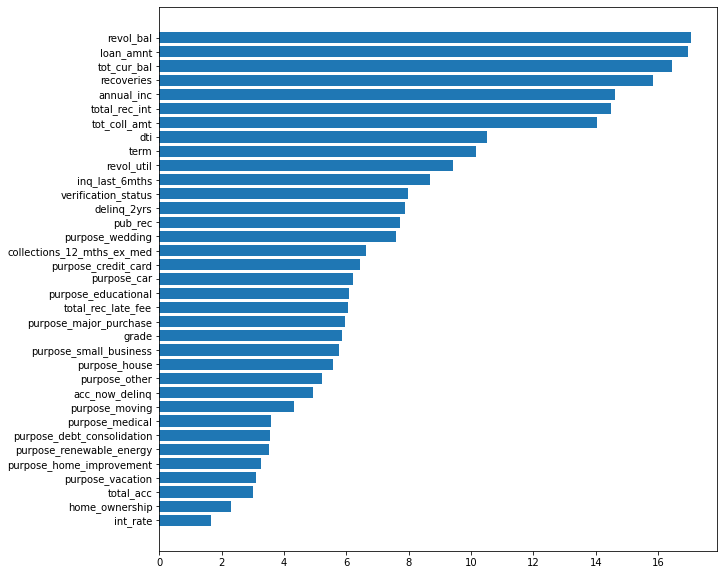

In [28]:
plt.figure(figsize=(10,10))
sorted_idx = feature_score['Feature_Score'].argsort()
plt.barh(feature_score['Features_list'][sorted_idx],np.log(feature_score['Feature_Score'][sorted_idx]))

In [242]:
X.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
purpose_car                   0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_house                 0
purpose_major_purchase        0
purpose_medical               0
purpose_

**Resample the training set "Under-sampling"**

In [29]:
from imblearn.under_sampling import NearMiss
N_mis = NearMiss(random_state=42)
X_resamp, y_resamp = N_mis.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
# #pd.DataFrame(y_resamp).hist(color='red')
# pdf = pd.DataFrame(y_resamp)
# pdf.columns = ["loan_status"]
# sns.countplot(pdf["loan_status"], hue=pdf["loan_status"])
# plt.show()

##Performing train test split using sklearn train_test_split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_resamp, y_resamp, test_size = 0.3, random_state =0)

##Checking the value counts

In [32]:
pd.DataFrame(y_train).value_counts(), pd.DataFrame(y_test).value_counts()

(1    88147
 0    88010
 dtype: int64, 0    37817
 1    37680
 dtype: int64)

In [33]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176157 entries, 0 to 176156
Data columns (total 35 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       176157 non-null  float64
 1   1       176157 non-null  float64
 2   2       176157 non-null  float64
 3   3       176157 non-null  float64
 4   4       176157 non-null  float64
 5   5       176157 non-null  float64
 6   6       176157 non-null  float64
 7   7       176157 non-null  float64
 8   8       176157 non-null  float64
 9   9       176157 non-null  float64
 10  10      176157 non-null  float64
 11  11      176157 non-null  float64
 12  12      176157 non-null  float64
 13  13      176157 non-null  float64
 14  14      176157 non-null  float64
 15  15      176157 non-null  float64
 16  16      176157 non-null  float64
 17  17      176157 non-null  float64
 18  18      176157 non-null  float64
 19  19      176157 non-null  float64
 20  20      176157 non-null  float64
 21  21      17

In [34]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
count,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,1.761570e+05,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,1.761570e+05,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000,176157.000000
mean,11289.017893,40.238628,13.142261,4.554363,4.271428,6.004533e+04,0.991082,17.142611,0.266217,0.736587,0.209489,11803.170354,52.594593,22.759672,1422.607244,0.319716,8.785432,0.012157,0.003667,115.900415,9.365250e+04,0.013204,0.224754,0.584575,0.000840,0.050029,0.004848,0.022202,0.010774,0.008016,0.056926,0.000817,0.012023,0.006415,0.004575
std,6702.164187,9.152135,4.115057,1.374078,0.644536,4.187261e+04,0.831978,8.114197,0.785032,1.028637,0.544612,14549.923271,23.886917,11.351208,1615.749874,3.270000,89.832443,0.121459,0.073268,1208.582163,1.196485e+05,0.114148,0.417421,0.492797,0.028973,0.218006,0.069458,0.147340,0.103240,0.089170,0.231703,0.028580,0.108990,0.079835,0.067487
min,500.000000,36.000000,5.320000,0.000000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6400.000000,36.000000,10.150000,4.000000,4.000000,3.900000e+04,0.000000,11.070000,0.000000,0.000000,0.000000,5125.000000,34.900000,14.000000,421.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.968300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.000000,36.000000,12.990000,5.000000,4.000000,5.100000e+04,1.000000,16.660000,0.000000,0.000000,0.000000,8762.000000,52.900000,21.000000,954.160000,0.000000,0.000000,0.000000,0.000000,0.000000,4.070200e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.000000,36.000000,15.610000,6.000000,5.000000,7.000000e+04,2.000000,22.740000,0.000000,1.000000,0.000000,14086.000000,70.900000,29.000000,1841.070000,0.000000,0.000000,0.000000,0.000000,0.000000,1.353035e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35000.000000,60.000000,28.990000,6.000000,5.000000,6.000000e+06,2.000000,59.180000,21.000000,31.000000,40.000000,952013.000000,150.700000,113.000000,22777.580000,208.819530,2099.510000,14.000000,14.000000,296368.000000,4.772549e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
X_train.shape,  X_test.shape, test_dataset.shape

((176157, 35), (75497, 35), (354951, 35))

In [36]:
test_dataset

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,14000,60,16.24,5,4,73500.0,2,28.65,1.0,1.0,0.0,29828,65.3,53.0,3915.61,0.0,0.0,0.0,0.0,0.0,85230.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,16000,60,9.49,6,5,105000.0,2,31.19,0.0,0.0,0.0,4161,19.4,63.0,1495.06,0.0,0.0,0.0,0.0,0.0,444991.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,11050,60,15.61,3,4,62300.0,0,21.73,1.0,0.0,1.0,12064,74.0,20.0,2096.21,0.0,0.0,0.0,0.0,0.0,105737.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,35000,60,12.69,5,3,150000.0,2,17.27,0.0,0.0,0.0,32549,45.0,26.0,1756.31,0.0,0.0,0.0,0.0,0.0,287022.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,6500,36,6.89,4,5,52000.0,0,20.19,0.0,0.0,0.0,5133,19.2,36.0,172.21,0.0,0.0,0.0,0.0,0.0,234278.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,15000,36,6.49,4,5,97250.0,0,12.46,0.0,0.0,0.0,12201,27.7,24.0,1180.32,0.0,0.0,0.0,0.0,0.0,143920.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
354947,35000,60,25.89,0,3,180000.0,1,11.78,2.0,2.0,0.0,52584,61.4,33.0,6508.41,0.0,0.0,0.0,0.0,0.0,772713.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
354948,14000,60,17.51,2,3,56000.0,1,16.44,0.0,3.0,1.0,10948,66.1,25.0,3456.24,0.0,0.0,0.0,0.0,0.0,532355.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
354949,20000,36,7.26,4,5,100000.0,2,15.00,0.0,0.0,0.0,33599,61.5,11.0,766.84,0.0,0.0,0.0,0.0,0.0,291998.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


**Standardization scales each input variable using Sklearn StandardScaler**

In [37]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train)
#test_data_en = pd.DataFrame(StandardScaler().fit_transform(X_test), columns = X.columns)

train_data_en = pd.DataFrame(scaler.transform(X_train), columns= X.columns)
test_data_en = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

submi_test_dataset= pd.DataFrame(scaler.transform(test_dataset), columns=test_dataset.columns)

In [39]:
train_data_en

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.255289,-0.463131,-0.523023,1.052080,-1.972631,-0.287667,1.212677,-1.823058,-0.339117,0.256080,-0.384659,-0.570738,-0.045824,-1.476470,-0.601120,-0.097773,-0.097798,-0.10009,-0.050052,-0.095898,-0.753488,-0.115675,-0.538436,0.842997,-0.028998,-0.229486,-0.069797,-0.150685,-0.104364,-0.089891,-0.245688,-0.028603,-0.110316,-0.08035,-0.067797
1,1.710047,-0.463131,0.599687,0.324318,1.130385,0.213856,0.010719,0.832788,-0.339117,2.200406,-0.384659,0.029473,0.159310,0.549752,0.763259,-0.097773,-0.097798,-0.10009,-0.050052,-0.095898,1.439951,-0.115675,-0.538436,0.842997,-0.028998,-0.229486,-0.069797,-0.150685,-0.104364,-0.089891,-0.245688,-0.028603,-0.110316,-0.08035,-0.067797
2,1.299730,-0.463131,-0.357775,1.052080,1.130385,1.360193,1.212677,0.201794,-0.339117,0.256080,-0.384659,1.529348,0.289088,4.073616,-0.642519,-0.097773,-0.097798,-0.10009,-0.050052,-0.095898,0.696237,-0.115675,-0.538436,0.842997,-0.028998,-0.229486,-0.069797,-0.150685,-0.104364,-0.089891,-0.245688,-0.028603,-0.110316,-0.08035,-0.067797
3,-0.043123,-0.463131,0.692031,-1.131208,-0.421123,0.894493,-1.191239,-0.641176,-0.339117,-0.716083,-0.384659,0.810579,1.930159,-1.035987,0.916935,-0.097773,-0.097798,-0.10009,-0.050052,0.263615,0.111427,-0.115675,-0.538436,0.842997,-0.028998,-0.229486,-0.069797,-0.150685,-0.104364,-0.089891,-0.245688,-0.028603,-0.110316,-0.08035,-0.067797
4,2.332982,2.159215,1.664074,-1.858970,1.130385,-0.144375,1.212677,2.054108,-0.339117,0.256080,-0.384659,-0.499535,-1.084052,0.725945,2.464883,-0.097773,-0.097798,-0.10009,-0.050052,13.928012,0.507158,-0.115675,1.857231,-1.186244,-0.028998,-0.229486,-0.069797,-0.150685,-0.104364,-0.089891,-0.245688,-0.028603,-0.110316,-0.08035,-0.067797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176152,-0.416138,-0.463131,-0.486571,1.052080,1.130385,0.595968,1.212677,-0.075499,-0.339117,2.200406,-0.384659,-0.533487,-1.079866,0.021172,0.011551,-0.097773,-0.097798,-0.10009,-0.050052,0.279750,1.395955,-0.115675,-0.538436,0.842997,-0.028998,-0.229486,-0.069797,-0.150685,-0.104364,-0.089891,-0.245688,-0.028603,-0.110316,-0.08035,-0.067797
176153,1.034890,2.159215,3.075966,-3.314495,-0.421123,-0.287667,1.212677,0.885782,-0.339117,0.256080,-0.384659,-0.110734,1.030082,-0.419311,-0.637952,-0.097773,-0.097798,-0.10009,-0.050052,-0.095898,-0.591497,-0.115675,-0.538436,-1.186244,-0.028998,4.357558,-0.069797,-0.150685,-0.104364,-0.089891,-0.245688,-0.028603,-0.110316,-0.08035,-0.067797
176154,-0.341535,-0.463131,0.247321,0.324318,1.130385,2.148300,1.212677,-1.094703,-0.339117,-0.716083,-0.384659,0.009061,0.603069,-0.331214,-0.038284,-0.097773,-0.097798,-0.10009,-0.050052,-0.095898,0.669216,-0.115675,1.857231,-1.186244,-0.028998,-0.229486,-0.069797,-0.150685,-0.104364,-0.089891,-0.245688,-0.028603,-0.110316,-0.08035,-0.067797
176155,1.333302,-0.463131,-0.037001,0.324318,-0.421123,-0.359313,0.010719,1.331915,-0.339117,-0.716083,-0.384659,0.658207,0.092327,-0.331214,0.978015,-0.097773,-0.097798,-0.10009,-0.050052,-0.095898,-0.567267,-0.115675,-0.538436,0.842997,-0.028998,-0.229486,-0.069797,-0.150685,-0.104364,-0.089891,-0.245688,-0.028603,-0.110316,-0.08035,-0.067797


In [42]:
test_data_en

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,0.106252,-0.463032,-1.276185,-0.403035,1.130363,0.333306,-1.191221,-0.885158,2.212682,-0.716131,1.450379,-0.459660,-1.171656,-0.595444,-0.654819,-0.097774,-0.097807,-0.099894,-0.049898,-0.095884,-0.648973
1,-0.162311,2.159679,0.205970,0.324681,-0.421151,-0.192075,-1.191221,0.722156,-0.339166,1.228357,-0.384437,0.437072,1.637236,0.021277,-0.532036,-0.097774,-0.097807,-0.099894,-0.049898,0.095243,0.466610
2,-0.106360,-0.463032,-0.724629,1.052398,-0.421151,-0.359242,-1.191221,-0.554821,-0.339166,-0.716131,-0.384437,-0.158687,0.042321,2.047644,-0.086471,-0.097774,-0.097807,-0.099894,-0.049898,-0.095884,0.772298
3,-0.882206,-0.463032,-0.248395,1.052398,-0.421151,-0.975371,-1.191221,-0.356372,-0.339166,0.256113,-0.384437,-0.356014,-1.242820,1.166615,-0.634097,-0.097774,-0.097807,-0.099894,-0.049898,-0.095884,-0.727353
4,-0.632294,-0.463032,-1.341788,-0.403035,-0.421151,-0.705516,1.212646,0.574243,-0.339166,-0.716131,-0.384437,-0.723999,-1.778644,-0.859753,-0.678641,-0.097774,-0.097807,-0.099894,-0.049898,0.028224,-0.674414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75492,-0.251831,-0.463032,-0.207089,0.324681,-0.421151,-0.836862,1.212646,0.904581,-0.339166,1.228357,1.450379,0.314937,0.917222,0.990409,-0.649465,-0.097774,-0.097807,-0.099894,-0.049898,-0.095884,-0.645764
75493,-0.938157,-0.463032,0.599592,-1.130752,-0.421151,-0.239837,0.010712,-0.088897,-0.339166,-0.716131,-0.384437,-0.391960,-0.564667,-1.035959,-0.764907,-0.097774,-0.097807,-0.099894,-0.049898,-0.095884,-0.508235
75494,-0.192151,2.159679,0.764816,-1.130752,-0.421151,-0.860743,1.212646,0.389353,-0.339166,-0.716131,-0.384437,-0.235803,0.745590,0.109380,0.481252,-0.097774,-0.097807,-0.099894,-0.049898,-0.095884,-0.696078
75495,1.299861,2.159679,-0.248395,1.052398,1.130363,0.619878,0.010712,1.467880,-0.339166,-0.716131,-0.384437,1.203765,0.502795,0.726100,1.645162,-0.097774,-0.097807,-0.099894,-0.049898,-0.095884,1.878921


**Importing Necessary Dependencies for model**

In [40]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
#from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.metrics import classification_report

**Created helper function for cross Validation & accuracies**

In [41]:
 #Function to cross Validation & accuracies
def cross_val(x_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
    return accuracies.mean()

**Helper function for making Confusion matrix and classification_report**

In [42]:
# Takes in a model, trains the model, and evaluates the model on the test set
def conf_matrix(y_test, y_pred_test):
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    print(classification_report(y_test,y_pred_test))
    # Print the confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

    #Precision = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[1][0])*100
    #Recall = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[0][1])*100  
    #print("Precision Score: = %0.4f" % Precision)
    #print("Recall Score: = %0.4f" % Recall)
    # Return the performance metric
    # return model_cross

**Hepler function fro ploting ROC_AUC curve**

In [43]:
def roc_auc_curve(model):
  y_pred_test = model.predict_proba(test_data_en)
  y_pred = y_pred_test[:,1]
  model_fpr, model_tpr, threshold = roc_curve(y_test, y_pred)
  model_auc = auc(model_fpr, model_tpr)

  plt.figure(figsize = (5,5))
  plot1 = plt.plot(model_fpr, model_tpr, marker ='.', label ="Model_Roc (auc= %0.3f)" % model_auc)
  plt.xlabel("False Positive rate")
  plt.ylabel("True positive rate")

  plt.legend()
  plt.show()

###**We will compare four different machine learning Cassification models:**

1 - Logistic Regression<br>
2 - Random Forest Classification<br>
3 - XGBoost<br>
4 - Deep neral network Tensorflow 2.0

*** Model Name: Logistic Regression***



In [44]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='liblinear',max_iter=100, C=0.001, random_state=42)
lm.fit(train_data_en, y_train)
y_pred_test_lm = lm.predict(test_data_en)
y_pred_lm = lm.predict_proba(test_data_en)


              precision    recall  f1-score   support

           0       0.74      0.83      0.78     37817
           1       0.81      0.71      0.75     37680

    accuracy                           0.77     75497
   macro avg       0.77      0.77      0.77     75497
weighted avg       0.77      0.77      0.77     75497



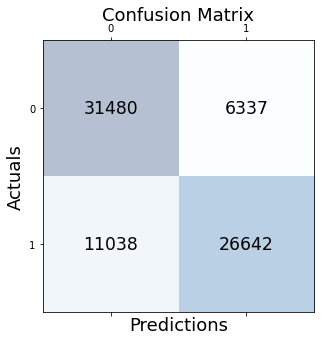

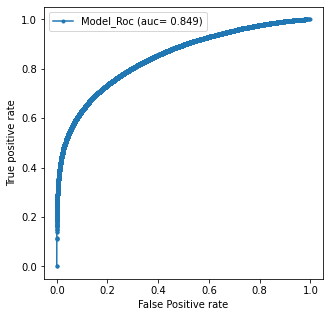

Logistic Regression Performance on the test set: Cross Validation Score = 0.7708


In [45]:
lm_cross = cross_val(train_data_en, y_train, lm)
f=conf_matrix(y_test, y_pred_test_lm)
roc_auc_curve(lm)
print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % lm_cross)

**Model Name: Random Forest Classification**

In [46]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
random.fit(train_data_en, y_train)
y_pred_test_rf = random.predict(test_data_en)
y_pred_rf = random.predict_proba(test_data_en)
random_sub_predictions = random.predict(submi_test_dataset)



              precision    recall  f1-score   support

           0       0.78      0.89      0.83     37817
           1       0.87      0.74      0.80     37680

    accuracy                           0.82     75497
   macro avg       0.82      0.82      0.81     75497
weighted avg       0.82      0.82      0.81     75497



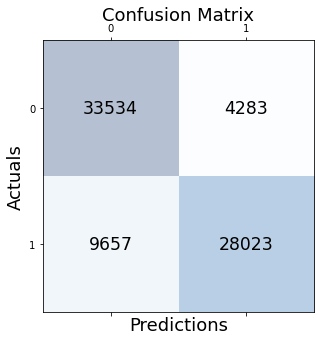

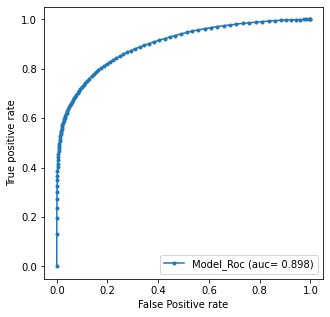

Random Forest Performance on the  test set: Cross Validation Score = 0.8144


In [47]:
random_cross = cross_val(train_data_en, y_train, random)
f=conf_matrix(y_test, y_pred_test_rf)
roc_auc_curve(random)
print('Random Forest Performance on the  test set: Cross Validation Score = %0.4f' % random_cross)

In [48]:
plt.figure(figsize=(10,10))
feat_imp = pd.DataFrame(X.columns,random.feature_importances_)
feat_imp

,0
0.087865,loan_amnt
0.007391,term
0.068098,int_rate
0.019830,grade
0.026114,home_ownership
0.124905,annual_inc
0.016850,verification_status
0.068150,dti
0.011007,delinq_2yrs
0.018158,inq_last_6mths


<Figure size 720x720 with 0 Axes>

<BarContainer object of 35 artists>

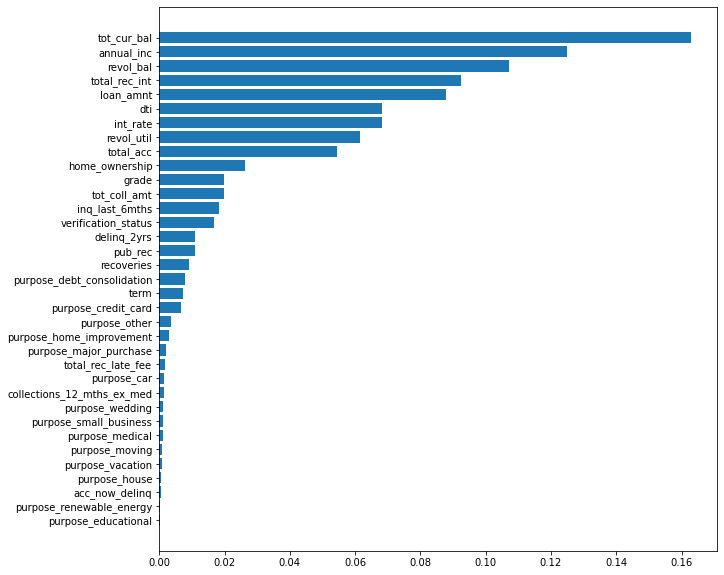

In [50]:
plt.figure(figsize=(10,10))
sorted_idx = random.feature_importances_.argsort()
plt.barh((test_data_en.columns)[sorted_idx], (random.feature_importances_)[sorted_idx])

**Model Name:  Gradiente Boosting Classification**

In [51]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb =  XGBClassifier(learning_rate =0.1,
 n_estimators=200,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

gb.fit(train_data_en, y_train)
y_pred_test_gb = gb.predict(test_data_en)
y_pred_gb = gb.predict_proba(test_data_en)



              precision    recall  f1-score   support

           0       0.81      0.89      0.85     37817
           1       0.88      0.79      0.83     37680

    accuracy                           0.84     75497
   macro avg       0.84      0.84      0.84     75497
weighted avg       0.84      0.84      0.84     75497



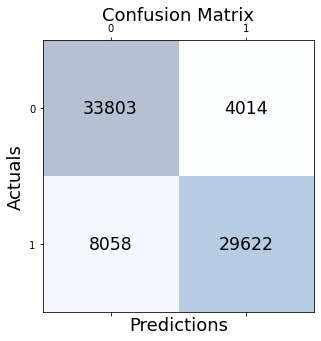

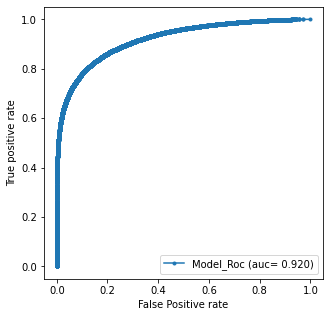

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.8392


In [52]:
gb_cross = cross_val(train_data_en, y_train, gb)
f=conf_matrix(y_test, y_pred_test_gb)
roc_auc_curve(gb)
print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

**Model name: DecisionTreeClassifier**

In [56]:
from sklearn.tree import DecisionTreeClassifier
DTClassi = DecisionTreeClassifier(criterion='entropy', random_state=42)

DTClassi.fit(train_data_en, y_train)
y_pred_test_DTC = DTClassi.predict(test_data_en)
y_pred_DTC = DTClassi.predict_proba(test_data_en)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     37817
           1       0.75      0.75      0.75     37680

    accuracy                           0.75     75497
   macro avg       0.75      0.75      0.75     75497
weighted avg       0.75      0.75      0.75     75497



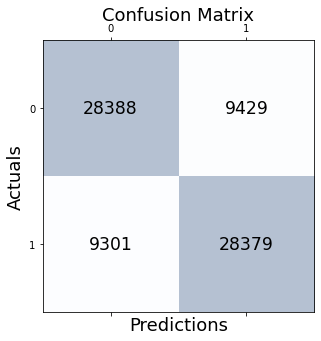

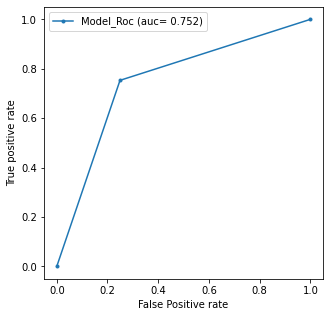

DecisionTree Classification Performance on the test set: Cross Validation Score = 0.7492


In [57]:
DTC_cross = cross_val(train_data_en, y_train, DTClassi)
f=conf_matrix(y_test, y_pred_test_DTC)
roc_auc_curve(DTClassi)
print('DecisionTree Classification Performance on the test set: Cross Validation Score = %0.4f' % DTC_cross)

**Model Name : Deep learning with keras tensorflow**

*   List item
*   List item



In [58]:
import tensorflow as tf 

In [59]:
import tensorflow as tf 
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation ="sigmoid")])

#Compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr= 0.001),
              metrics=[tf.keras.metrics.AUC(from_logits=True)])

early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25)
#Fit the model

history_1 = model_1.fit(train_data_en, y_train,
                        epochs=200, 
                        batch_size=500 , 
                       validation_data=(test_data_en, y_test),
                        callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
353/353 [==============================] - 4s 4ms/step - loss: 0.4872 - auc: 0.8335 - val_loss: 0.4430 - val_auc: 0.8652
Epoch 2/200
353/353 [==============================] - 1s 3ms/step - loss: 0.4441 - auc: 0.8639 - val_loss: 0.4246 - val_auc: 0.8768
Epoch 3/200
353/353 [==============================] - 1s 3ms/step - loss: 0.4276 - auc: 0.8747 - val_loss: 0.4122 - val_auc: 0.8844
Epoch 4/200
353/353 [==============================] - 1s 3ms/step - loss: 0.4164 - auc: 0.8821 - val_loss: 0.4030 - val_auc: 0.8900
Epoch 5/200
353/353 [==============================] - 1s 3ms/step - loss: 0.4095 - auc: 0.8864 - val_loss: 0.3976 - val_auc: 0.8928
Epoch 6/200
353/353 [==============================] - 1s 3ms/step - loss: 0.4039 - auc: 0.8895 - val_loss: 0.3940 - val_auc: 0.8948
Epoch 7/200
353/353 [==============================] - 1s 3ms/step - loss: 0.4005 - auc: 0.8914 - val_loss: 0.3929 - val_auc: 0.8963
Epoch 8/200
353/353 [==============================] - 1s 3ms/step - 

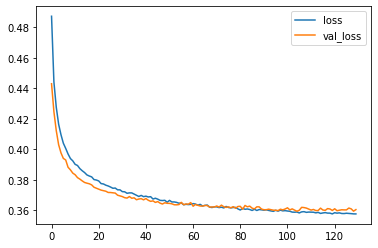

In [60]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()
#plot_loss_curve(history_1)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     37817
           1       0.89      0.77      0.83     37680

    accuracy                           0.84     75497
   macro avg       0.84      0.84      0.84     75497
weighted avg       0.84      0.84      0.84     75497



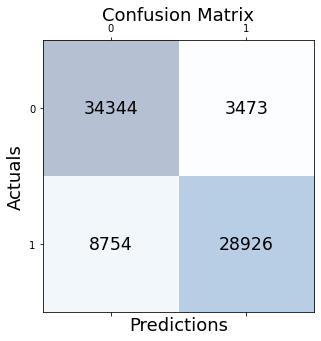

None 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85     37817
           1       0.89      0.77      0.83     37680

    accuracy                           0.84     75497
   macro avg       0.84      0.84      0.84     75497
weighted avg       0.84      0.84      0.84     75497



In [61]:
from sklearn.metrics import classification_report
predictions = tf.round(model_1.predict(test_data_en))
final_sub_predictions = model_1.predict(submi_test_dataset)


print(
        conf_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)

**Comparing Each ROC_AUC Curve**

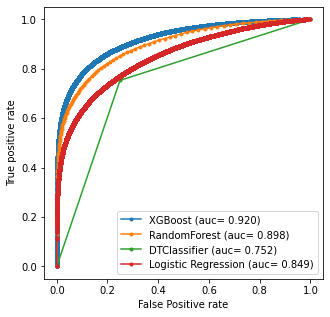

In [62]:
DTC_prob = y_pred_DTC[:,1]
gb_prob = y_pred_gb[:,1]
rf_prob = y_pred_rf[:,1]
lm_prob= y_pred_lm[:,1]

gb_fpr, gb_tpr, threshold = roc_curve(y_test, gb_prob)
gb_auc = auc(gb_fpr, gb_tpr)

random_fpr, random_tpr, threshold = roc_curve(y_test, rf_prob)
random_auc = auc(random_fpr, random_tpr)

DTC_fpr, DTC_tpr, threshold = roc_curve(y_test, DTC_prob)
DTC_auc = auc(DTC_fpr, DTC_tpr)

lm_fpr, lm_tpr, threshold = roc_curve(y_test, lm_prob)
lm_auc = auc(lm_fpr, lm_tpr)

plt.figure(figsize = (5,5))

#plot_roc_curve(random, y_test, rf_prob )

plt.plot(gb_fpr, gb_tpr, marker ='.', label ="XGBoost (auc= %0.3f)" % gb_auc)
plt.plot(random_fpr, random_tpr, marker ='.', label ="RandomForest (auc= %0.3f)" % random_auc)
plt.plot(DTC_fpr, DTC_tpr, marker ='.', label ="DTClassifier (auc= %0.3f)" % DTC_auc)
plt.plot(lm_fpr, lm_tpr, marker ='.', label ="Logistic Regression (auc= %0.3f)" % lm_auc)

plt.xlabel("False Positive rate")
plt.ylabel("True positive rate")

plt.legend()
plt.show()


#**AUC Value of All Model used:**

**Deep learning with keras tensorflow_AUC   =0.91**<br>
**RandomForest_AUC        = 0.90**<br>
**XGBoost_AUC             = 0.92**<br>
**Logistic_Regression_AUC = 0.85**<br>
**DTClassifier            = 0.75**


#***Final model used for prediction is  "Deep learning with keras tensorflow"***

In [66]:
member_id = pd.DataFrame(test_set['member_id'])
loan_status = pd.DataFrame(final_sub_predictions)
final_df = [member_id, loan_status]

In [67]:
final_submission = pd.concat(final_df,  axis=1, join='inner')
final_submission.columns = ['member_id', 'loan_status']

In [68]:
final_submission.to_csv (r'/content/drive/MyDrive/Artivatic/ML_Artivatic_dataset/final_submission.csv', index=False,header=True)

In [69]:
path ="/content/drive/MyDrive/Artivatic/ML_Artivatic_dataset/final_submission.csv"
sd  =pd.read_csv(path)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3493e5cd90>]],
      dtype=object)

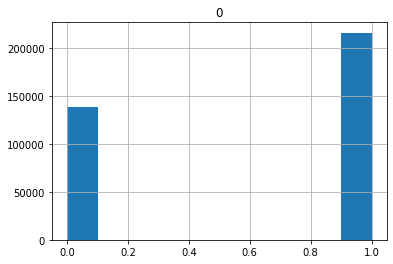

In [70]:
s = tf.round(sd['loan_status'])
pd.DataFrame(s).hist()

**Scope of Improvement:**<br>
1: Running Model for more iteration<br>
2: By understandiing data deeply<br>
3: by using Model Hyperparametric Tuning <br>
4: By Incoporating other Model like SVM etc
